# Membangun Graph dan Komunitas dari data Facebook

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

df=pd.read_csv('/content/drive/MyDrive/semester 5/ppw/data facebook/facebook_combined.txt', sep=' ', header=None)
df.head()

,0,1
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


## Membangun Graph Undirected (hubungan 2 arah)

Total Node   : 4039
Total Edges  : 88234

Graph berhasil dimuat!

Menjalankan Louvain Community Detection...
Jumlah komunitas ditemukan: 16
Modularity Score          : 0.8349



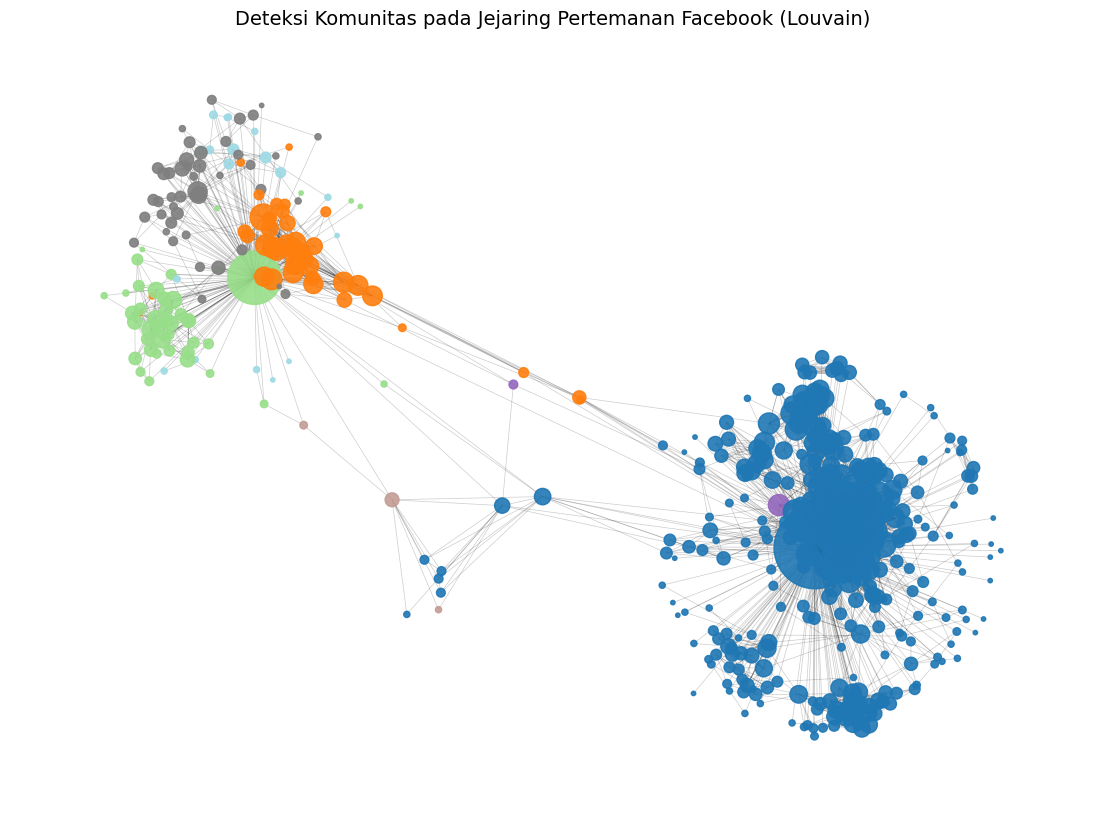

=== ANALISIS KOMUNITAS FACEBOOK ===

Top 10 komunitas berdasarkan jumlah anggota:
community
14     19
6      19
12     25
13     60
10     73
7     124
15    206
8     226
11    237
5     325
Name: count, dtype: int64
Urutan komunitas dari jumlah anggota terkecil ke terbesar:
community
14     19
6      19
12     25
13     60
10     73
7     124
15    206
8     226
11    237
5     325
0     350
3     423
1     430
2     439
4     535
9     548
Name: count, dtype: int64


In [22]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from community import community_louvain
import numpy as np

# Bangun graph
G = nx.from_pandas_edgelist(
    df, 'source', 'target',
    create_using=nx.Graph() # Ensuring it's an undirected graph
)


print(f"Total Node   : {G.number_of_nodes()}")
print(f"Total Edges  : {G.number_of_edges()}")
print("\nGraph berhasil dimuat!\n")

# ======================================
# 2. DETEKSI KOMUNITAS (Louvain)
# ======================================
print("Menjalankan Louvain Community Detection...")

partition = community_louvain.best_partition(G)
modularity_value = community_louvain.modularity(partition, G)

print(f"Jumlah komunitas ditemukan: {len(set(partition.values()))}")
print(f"Modularity Score          : {modularity_value:.4f}\n")

# ======================================
#    Hanya ambil 500 node untuk menjaga performa visualisasi
# ======================================
sub_nodes = list(G.nodes())[:500]
H = G.subgraph(sub_nodes)

partition_sub = {n: partition[n] for n in H.nodes()}
node_degree = dict(H.degree())

plt.figure(figsize=(14, 10))
pos = nx.spring_layout(H, k=0.12, seed=42)

nx.draw_networkx_nodes(
H, pos,
    node_size=[node_degree[n] * 10 for n in H.nodes()],
    node_color=list(partition_sub.values()),
    cmap="tab20",
    alpha=0.9
)

nx.draw_networkx_edges(
H, pos,
    alpha=0.2,
    width=0.5
)

plt.title("Deteksi Komunitas pada Jejaring Pertemanan Facebook (Louvain)", fontsize=14)
plt.axis("off")
plt.show()

# ======================================
# 4. ANALISIS KOMUNITAS
# ======================================
print("=== ANALISIS KOMUNITAS FACEBOOK ===\n")

community_df = pd.DataFrame.from_dict(partition, orient='index', columns=['community'])
community_sizes = community_df['community'].value_counts().sort_values(ascending=True)

print("Top 10 komunitas berdasarkan jumlah anggota:")
print(community_sizes.head(10))

print("Urutan komunitas dari jumlah anggota terkecil ke terbesar:")
print(community_sizes)

## cek hubungan node ke node

In [23]:
node_target = 5 # node yang ingin dicek

if node_target in G.nodes():
    # daftar tetangga node (node-node yang terhubung langsung)
    neighbors = list(G.neighbors(node_target))

    print(f"Node {node_target} terhubung ke: {neighbors}")
    print(f"Jumlah node yang terhubung: {len(neighbors)}")
else:
    print(f"Node {node_target} tidak ada dalam graph.")

Node 5 terhubung ke: [0, 87, 122, 156, 158, 169, 180, 187, 204, 213, 235, 315, 316]
Jumlah node yang terhubung: 13


## Cek Komunitas


Community 1 -> nodes: 430, edges: 6061


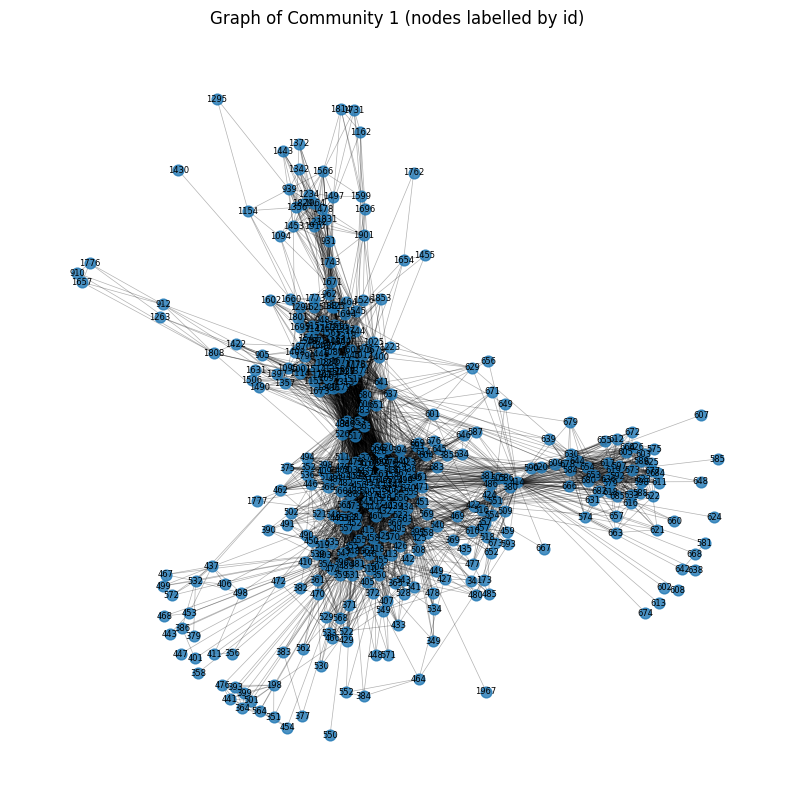

Saved figure: community_1_graph.png


<Figure size 640x480 with 0 Axes>

In [24]:
plot_comm = 1

# Group nodes by community from the 'partition' dictionary
members = {}
for node, comm_id in partition.items():
    if comm_id not in members:
        members[comm_id] = []
    members[comm_id].append(node)

if plot_comm not in members:
    print(f"\nCommunity {plot_comm} tidak ditemukan (max community id: {max(members.keys())})")
else:
    nodes_comm = members[plot_comm]
    H = G.subgraph(nodes_comm).copy()
    print(f"\nCommunity {plot_comm} -> nodes: {len(H.nodes())}, edges: {len(H.edges())}")

    # plot (size dan layout)
    plt.figure(figsize=(10,10))
    pos = nx.spring_layout(H, seed=42)
    nx.draw_networkx_nodes(H, pos, node_size=60, node_color='tab:blue', alpha=0.8)
    nx.draw_networkx_edges(H, pos, alpha=0.3, width=0.5)
    nx.draw_networkx_labels(H, pos, font_size=6)    # show node ids
    plt.title(f"Graph of Community {plot_comm} (nodes labelled by id)")
    plt.axis('off')
    plt.show()

    # Simpan gambar
    plt.savefig(f"community_{plot_comm}_graph.png", dpi=300, bbox_inches='tight')
    print(f"Saved figure: community_{plot_comm}_graph.png")

## Mebnagun graph dengan cara DIRECTED ( tidak se arah )

In [25]:
import pandas as pd

data=pd.read_csv('/content/drive/MyDrive/semester 5/ppw/data facebook/facebook_combined.txt', sep=' ', header=None)
data.head()

,0,1
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


In [27]:
import networkx as nx

# ===============================
# 1. Bangun Directed Graph
# ===============================
G_dir = nx.from_pandas_edgelist(
    data,
    source=0, # Changed from 'source' to 0
    target=1, # Changed from 'target' to 1
    create_using=nx.DiGraph()
)

print("Graph DIRECTED berhasil dibuat")
print(f"Total node  : {G_dir.number_of_nodes()}")
print(f"Total edge : {G_dir.number_of_edges()}")

Graph DIRECTED berhasil dibuat
Total node  : 4039
Total edge : 88234


In [28]:
node_target = 5

if node_target in G_dir.nodes():
    neighbors = list(G_dir.successors(node_target))
    print(f"Node {node_target} terhubung ke (arah keluar):")
    print(neighbors)
    print(f"Jumlah: {len(neighbors)}")
else:
    print(f"Node {node_target} tidak ditemukan")

Node 5 terhubung ke (arah keluar):
[87, 122, 156, 158, 169, 180, 187, 204, 213, 235, 315, 316]
Jumlah: 12
